# 필요 라이브러리 코드

In [55]:
from matplotlib import font_manager, rc
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [56]:
# 폰트 설정
rc('font', family = 'AppleGothic')

# 그래프에서 마이너스 기호가 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 프리시즌 데이터 분석
- 시즌 개막 전 6주동안 프리시즌을 치름
- 팀별로 5개 팀과 2차전까지 10경기를 치르며 총 50경기 진행함

In [57]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('Pre_Season_Batter.csv')

# 정규 시즌 데이터 로드
regular_season_df = pd.read_csv('Regular_Season_Batter.csv')

In [58]:
# 데이터 크기 파악 (1329, 29)
print(preseason_df.shape) 

# 데이터 출력, 열이 많을 때도 표로 예쁘게 출력되는 모듈
display(preseason_df.head()) 

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [59]:
pd.set_option('display.max_columns',None) # 모든 열 보기 
pd.set_option('display.max_rows', None) # 모든 행 보기

In [60]:
# 데이터의 기초통계량 확인 - 결측치 확인, 연도 최소 최대 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


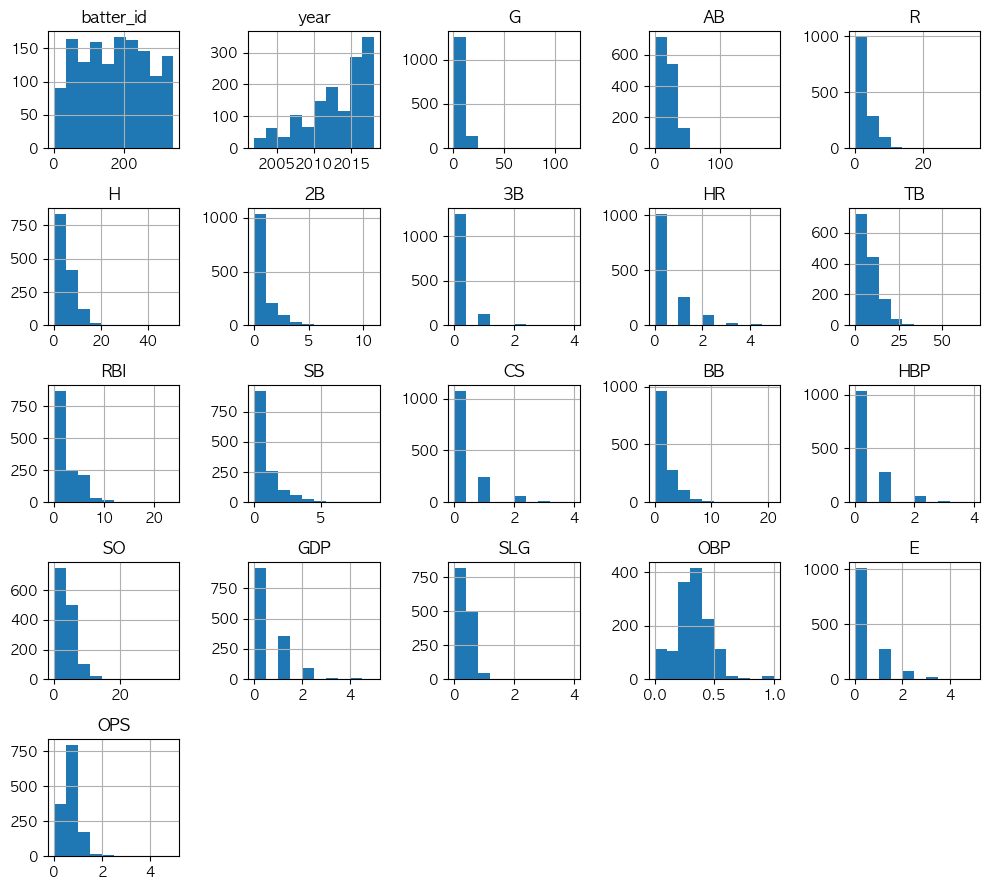

In [61]:
# 데이터 시각화, 수치형 변수 Histogram으로 분포 보기
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간의 간격 늘려주어서 글자들이 보이게
plt.show()

In [62]:
# 정규 시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year').count().iloc[:,0].rename('regular')

# 프리 시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year').count().iloc[:,0].rename('preseason')

pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count, 2).rename('ratio')],axis=1).transpose().loc[:,2002:] # 2002년부터 본다

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [63]:
# 타자의 이름과 연도를 이용해 새로운 인덱스 생성
regular_season_df['new_idx'] = regular_season_df['batter_name']+ regular_season_df['year'].apply(str) # str 값으로 형변환
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 idx의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오고 인덱스 정렬
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x : x in intersection_idx)].copy() 
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x : x in intersection_idx)].copy() 
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

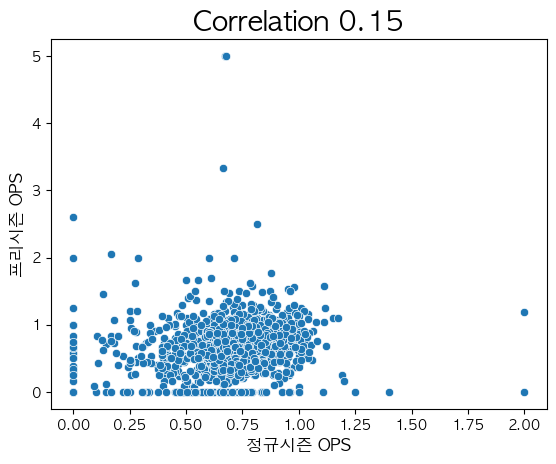

In [64]:
# 정규 시즌과 프리 시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(x=regular_season_new['OPS'], y=preseason_new['OPS'])
plt.title('Correlation' +' ' + str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()

# 정규시즌 데이터 분석

In [65]:
display(regular_season_df.shape, regular_season_df.head())

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


In [66]:
regular_season_df.describe() # 연도 min 확인 

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


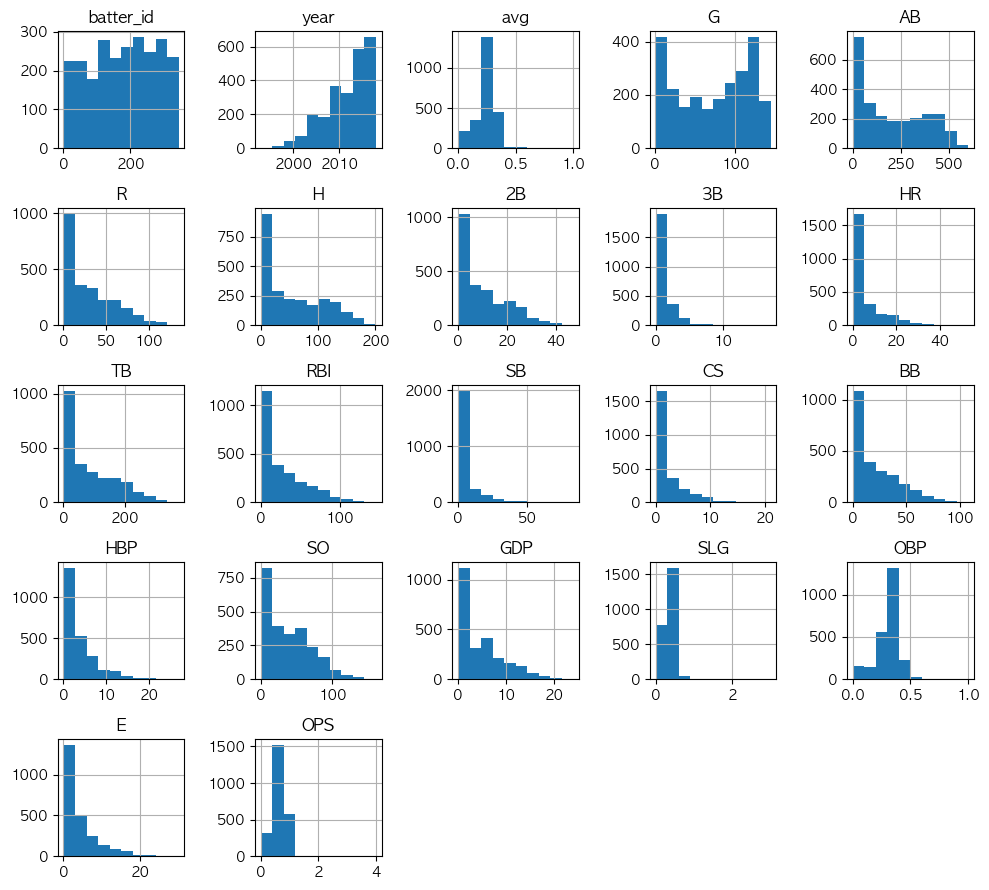

In [67]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

## OPS에 대한 자세한 이해

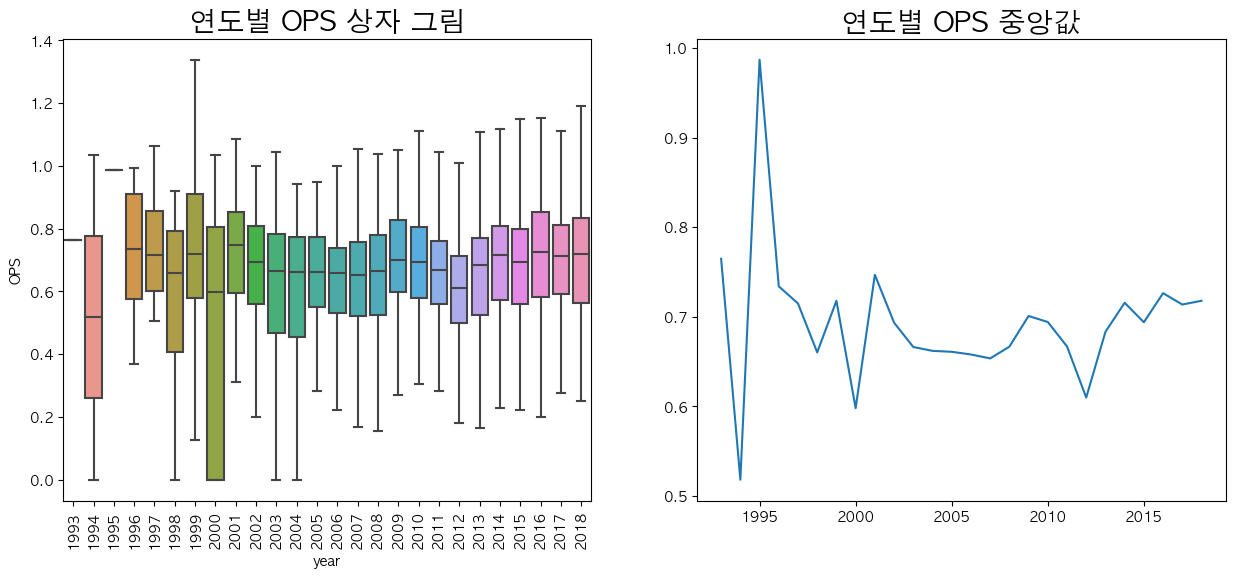

In [68]:
# boxplot
plt.figure(figsize= (15,6)) # 그래프 크기 조정

plt.subplot(1,2,1) # 1행 2열의 첫번째 (1행 1열)의 그래프
g = sns.boxplot(x='year', y='OPS', data = regular_season_df, showfliers = False )  # 박스 범위 벗어난 아웃라이어 표시하지 않기
g.set_title('연도별 OPS 상자 그림', size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(1,2,2) # 1행 2열의 두번째 (1행 2열)의 그래프
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [69]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


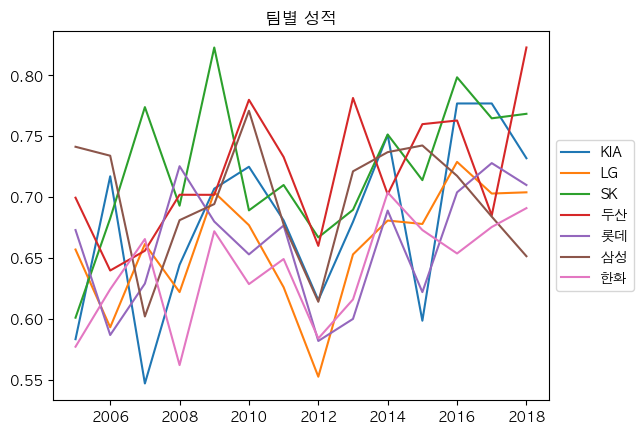

In [70]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index='team', columns='year', values='OPS', aggfunc='median')

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1)<=0

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns,
           loc='center left', bbox_to_anchor=(1,0.5))
plt.title('팀별 성적')
plt.show()



## 몸무게와 관련있는지 확인

In [71]:
# 키와 몸무게가 성적과 상관이 있는지 살펴봄

import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)


Text(0.5, 0, '몸무게/키')

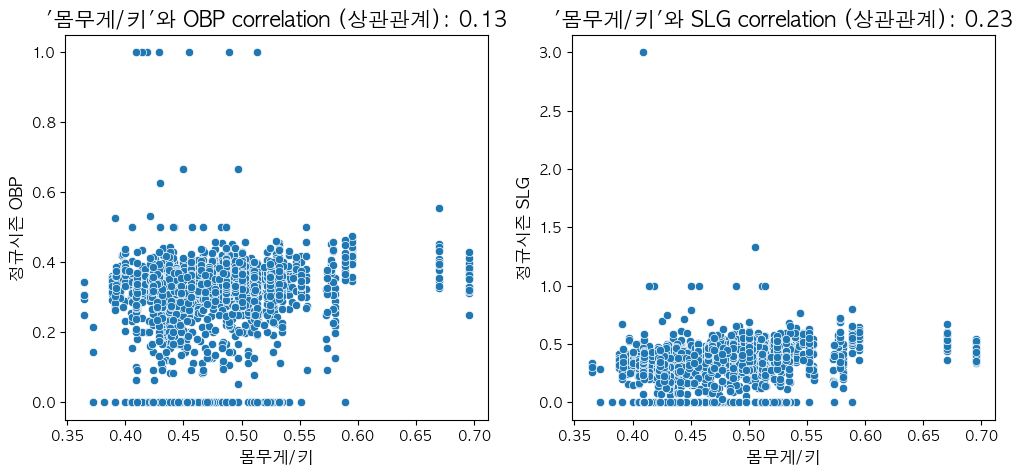

In [72]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight']/regular_season_df['height']

plt.figure(figsize=(12,5))

# 정규시즌과 프리시즌의 OBP 상관관계 계산
plt.subplot(1,2,1) # 1행 2열의 첫번째 (1행 1열) 그래프
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(x=regular_season_df['weight_per_height'], y=regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation (상관관계): "+ str(np.round(correlation,2)) ,fontsize=15)
plt.ylabel('정규시즌 OBP', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)

# 정규시즌과 프리시즌의 SLG 상관관계 계싼
plt.subplot(1,2,2)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(x=regular_season_df['weight_per_height'], y=regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation (상관관계): "+ str(np.round(correlation,2)), fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)


## 포지션과 관련된 기록

In [73]:
regular_season_df['position'].value_counts() # 포지션과 타자가 사용하는 손과 결합되어 있음

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [94]:
# position
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0],regular_season_df['pos'][0],regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


Text(0.5, 1.0, '타석방향별 OPS')

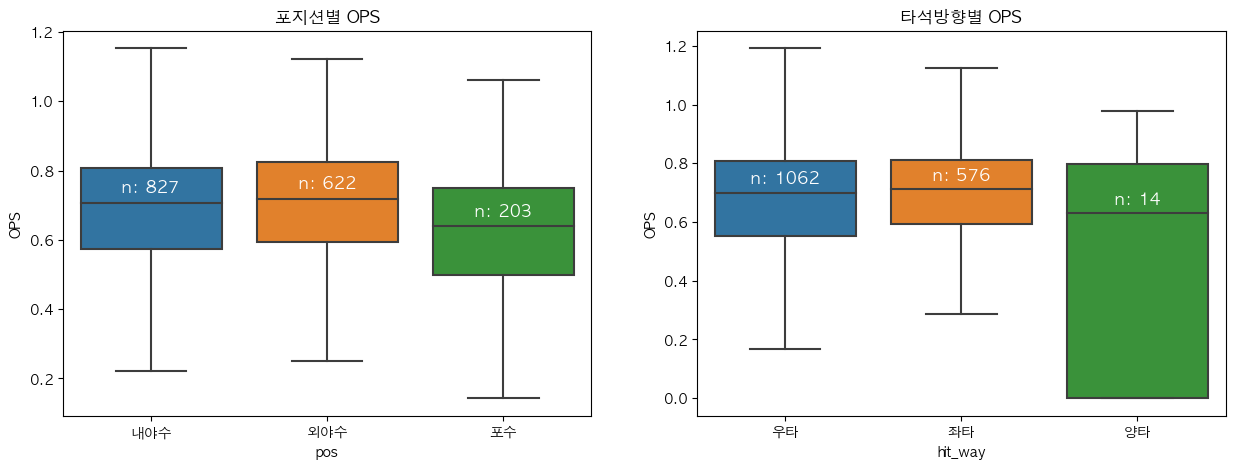

In [95]:
plt.figure(figsize=(15,5))

# position별 OPS 중앙값
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos', y='OPS', data=regular_season_df, showfliers=False)
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
        medians[label.get_text()] + 0.03,
        nobs[label.get_text()],
        horizontalalignment = 'center',
        size='large',
        color='w',
        weight='semibold')

ax.set_title('포지션별 OPS')

# 타자 방향별 OPS 중앙값
plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

# 키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
        medians[label.get_text()] + 0.03,
        nobs[label.get_text()],
        horizontalalignment = 'center',
        size='large',
        color='w',
        weight='semibold')

ax.set_title('타석방향별 OPS')


## 커리어와 관련된 변수 탐색

In [97]:
regular_season_df['career'].head(10)

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
5                         광주대성초-광주동성중-광주동성고
6                         광주대성초-광주동성중-광주동성고
7                         관산초-부천중-야탑고-NC-상무
8                         관산초-부천중-야탑고-NC-상무
9                         관산초-부천중-야탑고-NC-상무
Name: career, dtype: object